In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_csv('housing_price_pred_train.csv')

In [3]:
dataset.shape

(1460, 81)

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis

In [5]:
## Missing values in Dataset

nan_features = []
for features in dataset.columns:
    if dataset[features].isnull().sum() >1:
        nan_features.append(features)
nan_features

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

<AxesSubplot:>

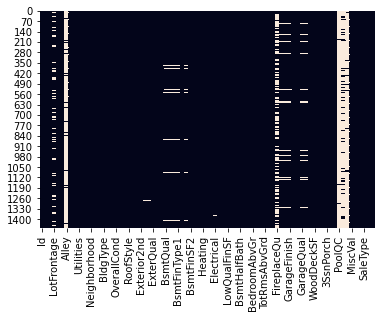

In [6]:
sns.heatmap(dataset.isnull(), cbar = False)

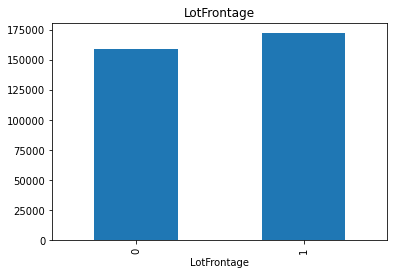

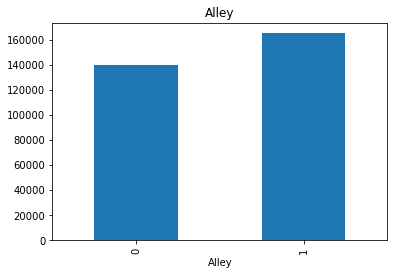

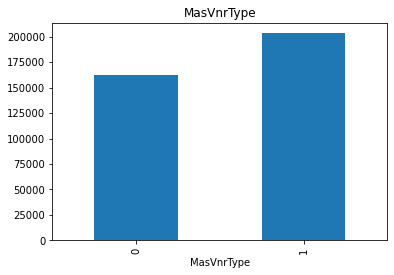

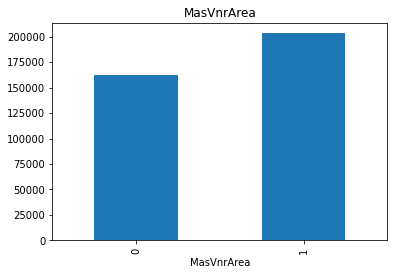

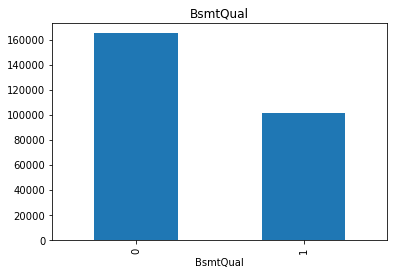

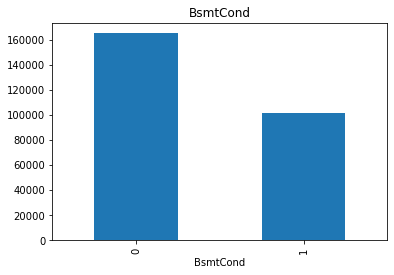

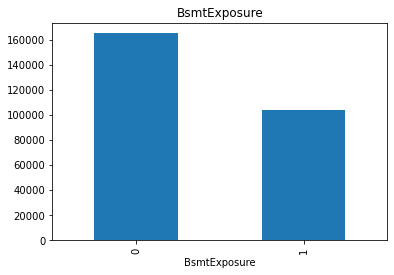

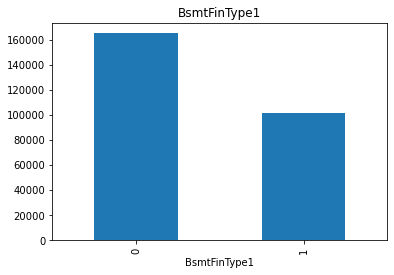

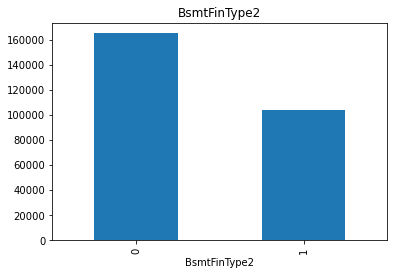

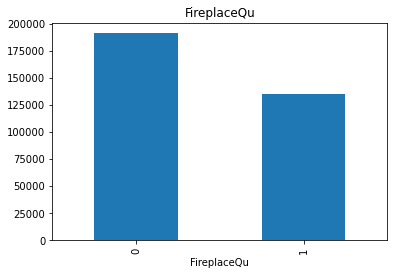

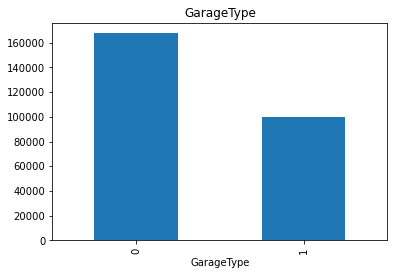

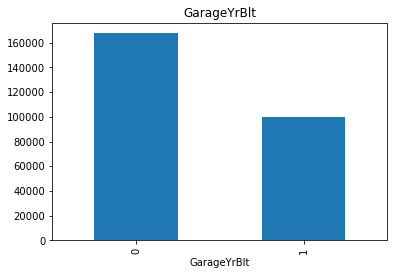

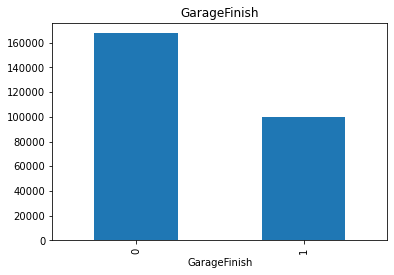

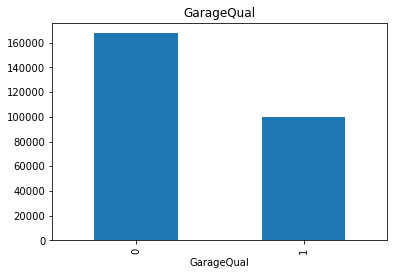

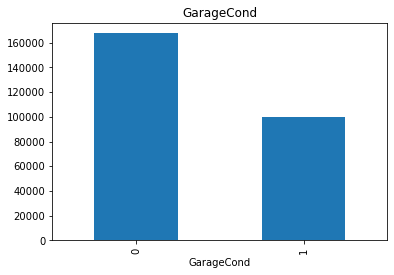

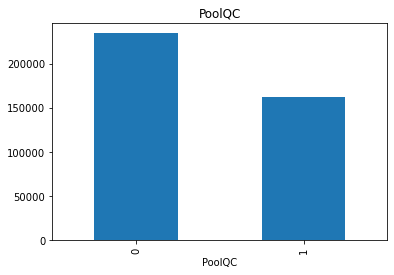

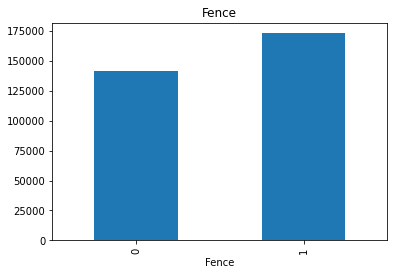

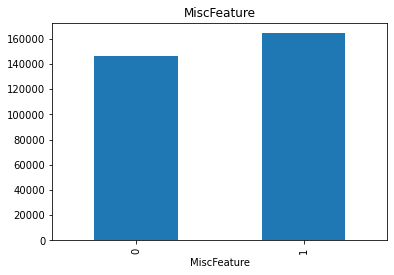

In [7]:
for feature in nan_features:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [8]:
#Numerical Features

numerical_feature = []
for feature in dataset.columns:
    if dataset[feature].dtypes != 'O':
        numerical_feature.append(feature)
        
dataset[numerical_feature].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [9]:
# Temporal features
Temporal_features = []
for feature in numerical_feature:
    if 'Yr' in feature or 'Year' in feature:
        Temporal_features.append(feature)
dataset[Temporal_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


<AxesSubplot:xlabel='YrSold'>

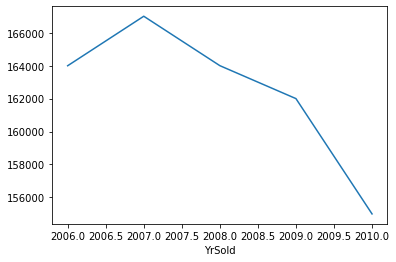

In [10]:
dataset.groupby('YrSold')['SalePrice'].median().plot()


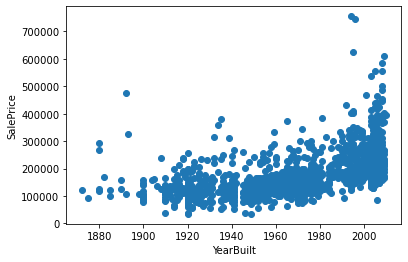

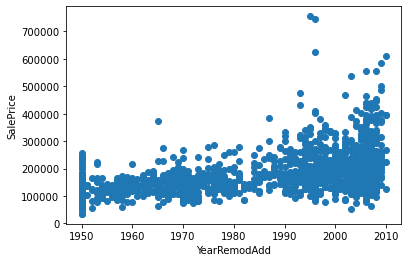

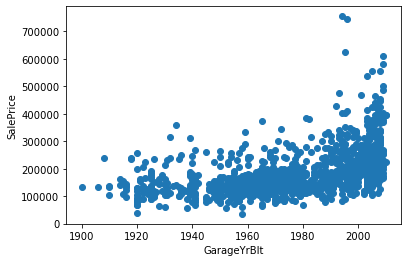

In [11]:
for feature in Temporal_features:
    if feature != 'YrSold':
        data = dataset.copy()
        #data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [12]:
#Numerical Variables are of 2 Types: 
# Continous and Discrete

discrete_features = []
for feature in numerical_feature:
    if len(dataset[feature].unique())<25 and feature not in Temporal_features and ['Id']:
        discrete_features.append(feature)
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [13]:
dataset[discrete_features]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4


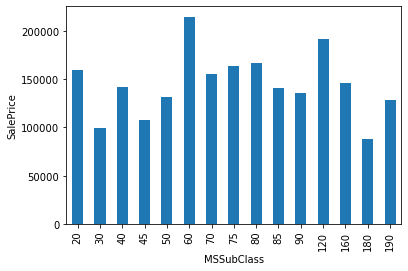

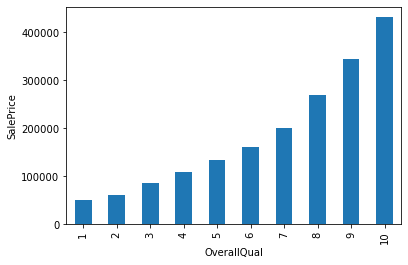

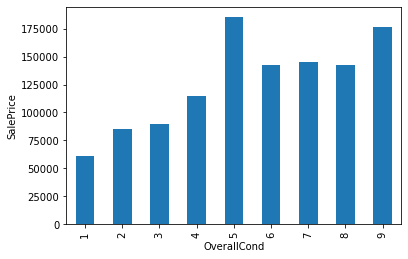

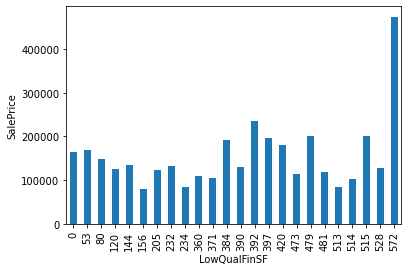

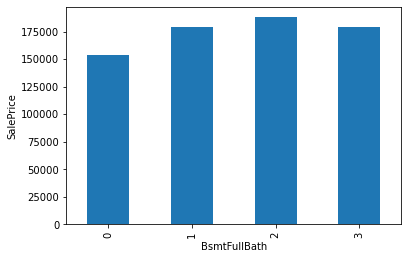

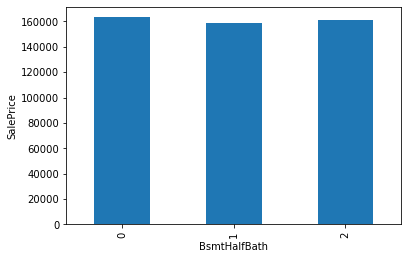

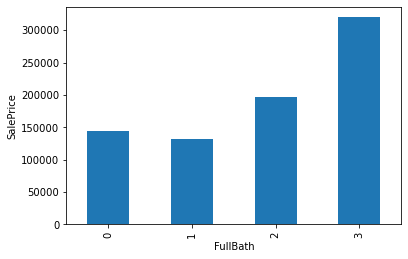

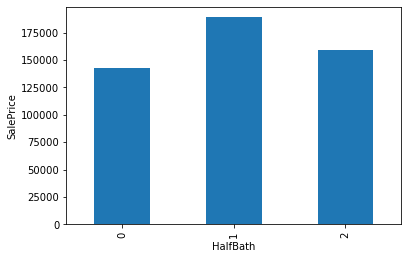

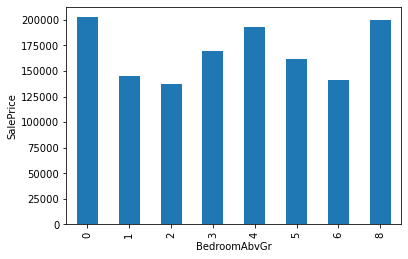

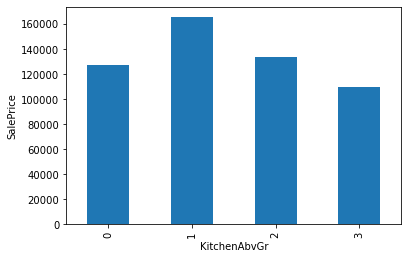

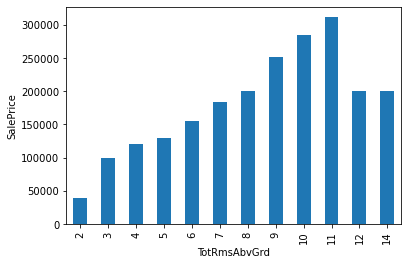

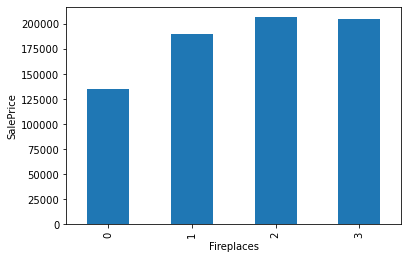

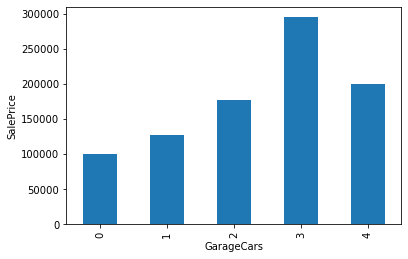

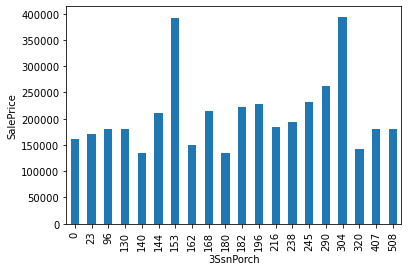

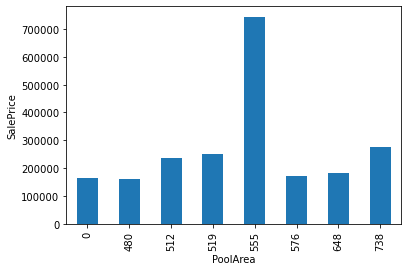

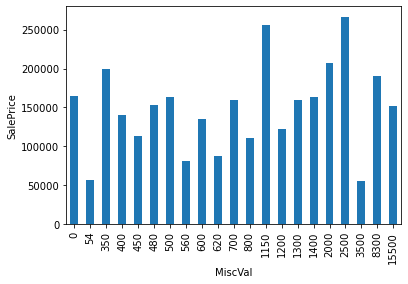

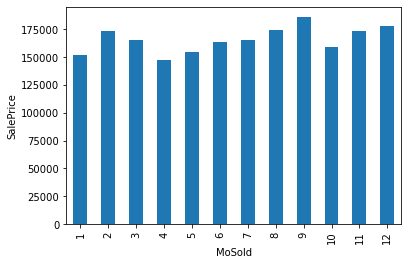

In [14]:
#Relationship of Discrete features with SalePrice
for feature in discrete_features:
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()
    

In [15]:
continous_features = []
for feature in numerical_feature:
    if feature not in discrete_features + Temporal_features+['Id']:
        continous_features.append(feature)
continous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [16]:
dataset[continous_features]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,1647,460,0,40,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,2073,500,349,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,2340,252,0,60,0,0,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,1078,240,366,0,112,0,142125


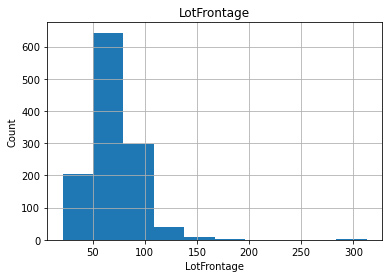

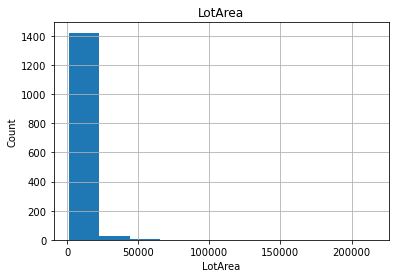

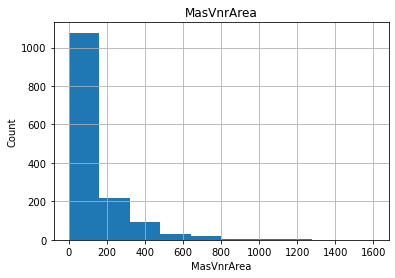

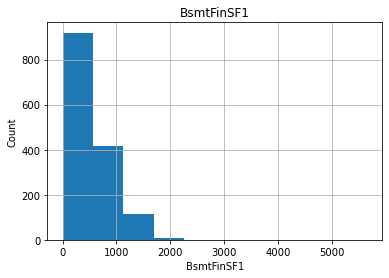

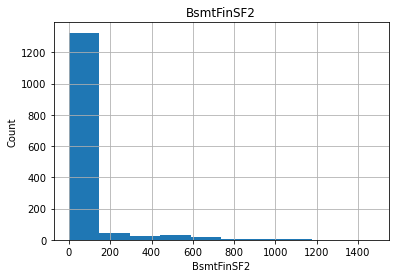

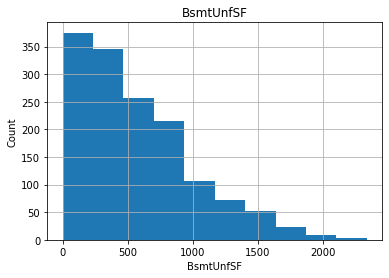

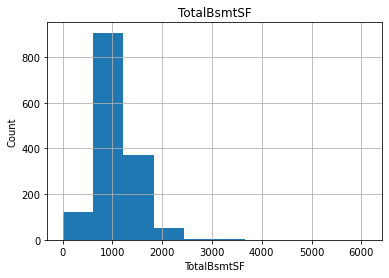

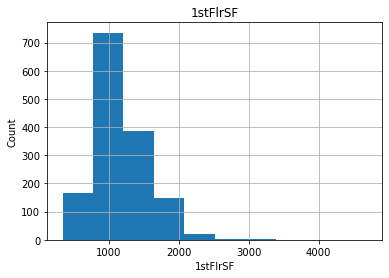

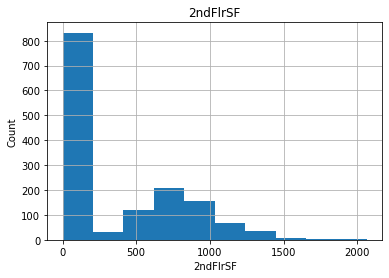

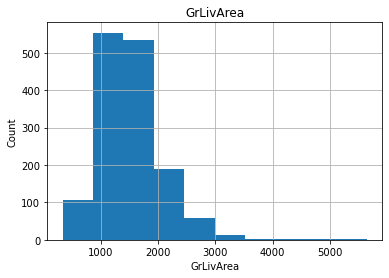

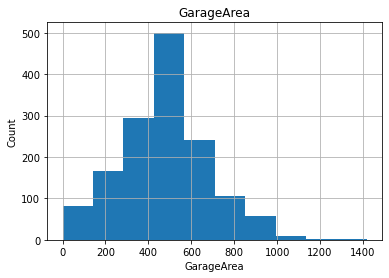

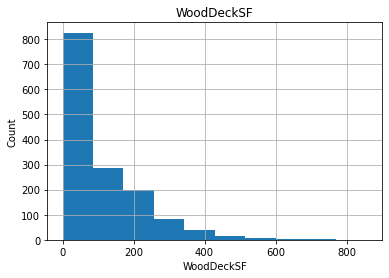

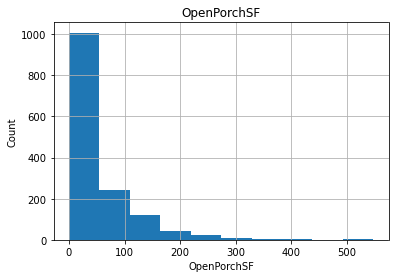

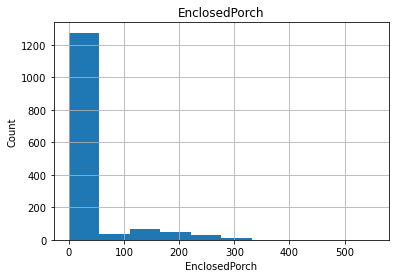

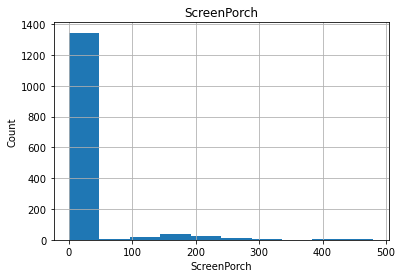

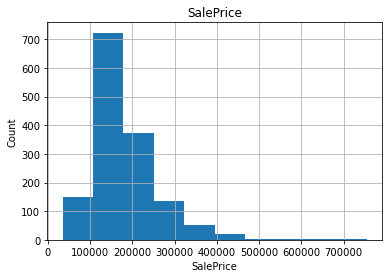

In [17]:
#Analysing the distribution of continous features with help of Histograms
for feature in continous_features:
    dataset[feature].hist()
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [18]:
# As we can see from the Histogram plots that most of continous features have skewed data i.e. there 
#distribution is not gaussian. So for solving Regression Problems it is better to have standard normal
#distribution of the continous variables 

In [19]:
## We will be using logarithmic transformation

data = dataset.copy()
for feature in continous_features:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature]) 

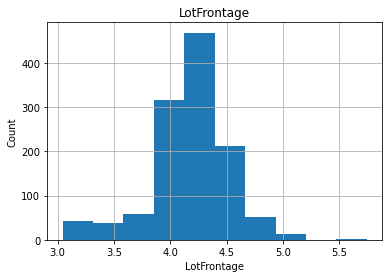

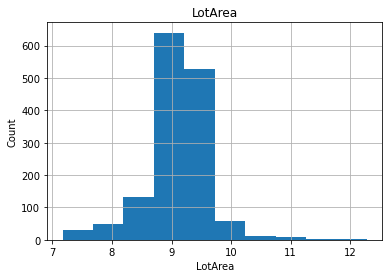

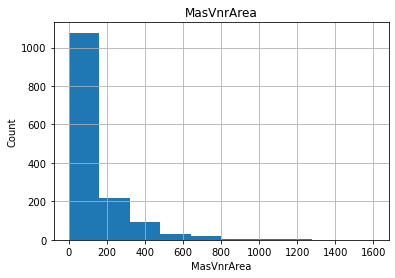

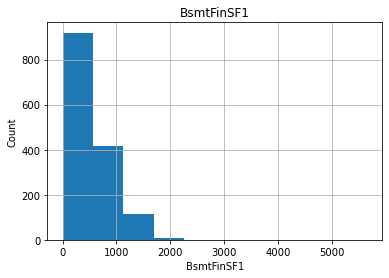

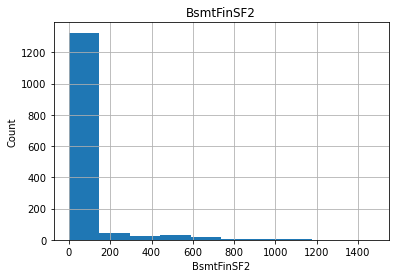

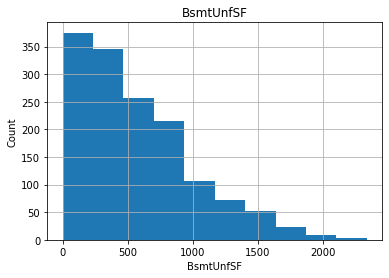

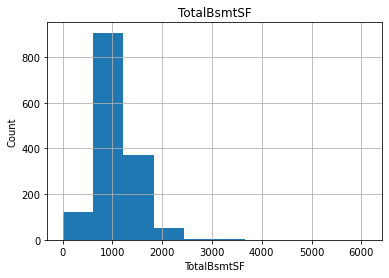

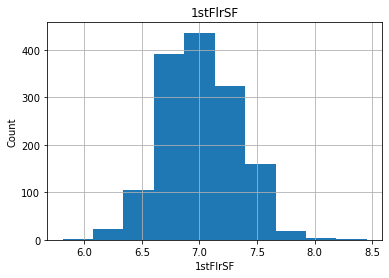

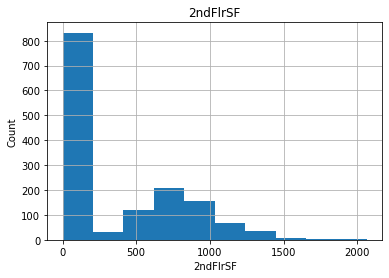

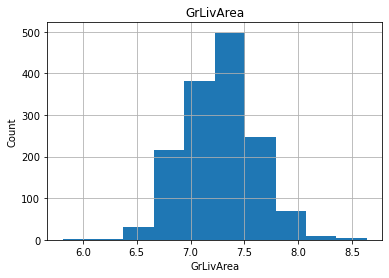

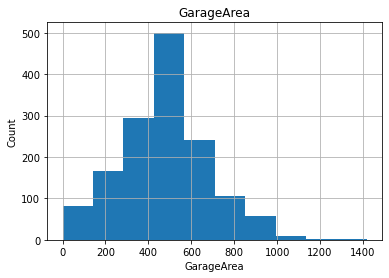

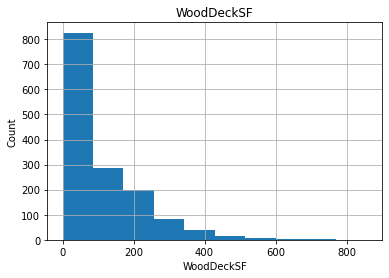

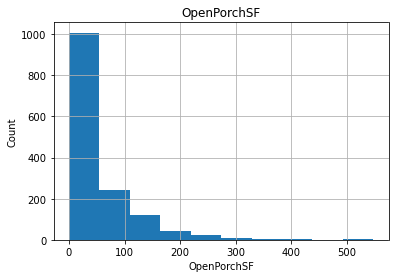

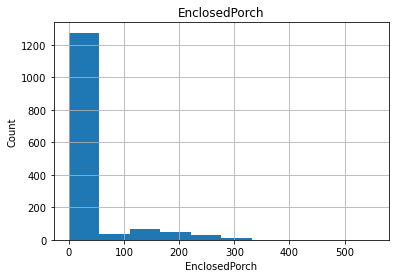

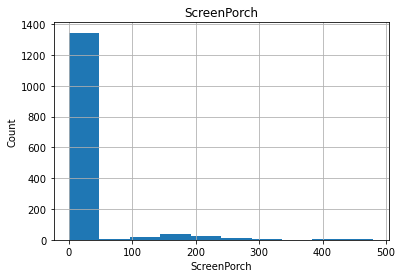

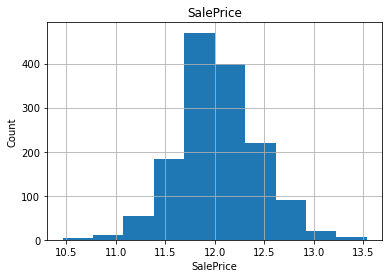

In [20]:
for feature in continous_features:
    data[feature].hist()
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

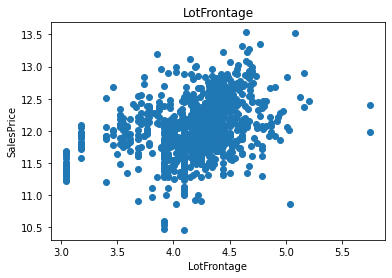

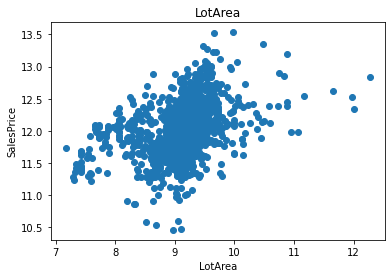

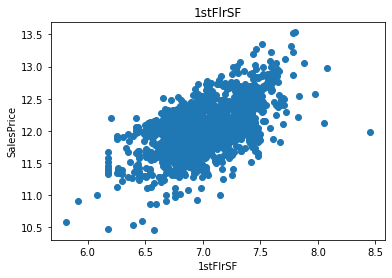

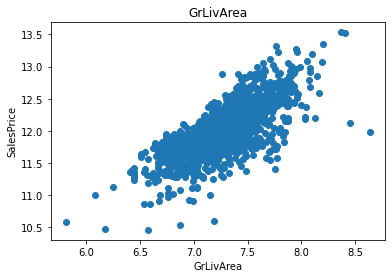

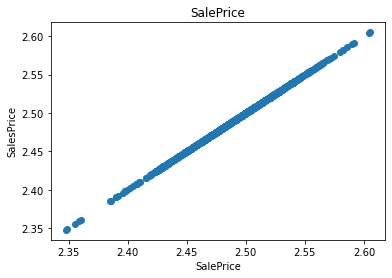

In [21]:
#Converting distribution to normal
for feature in continous_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()


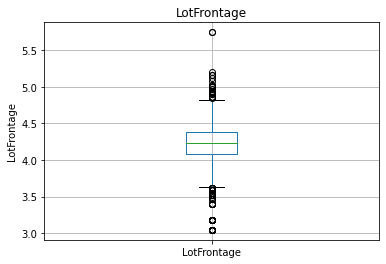

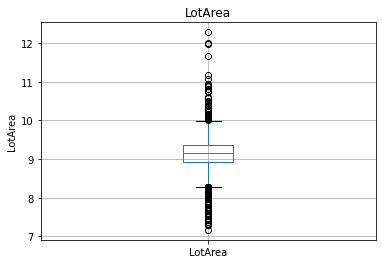

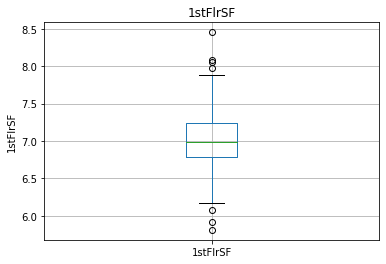

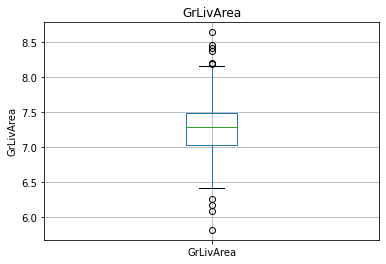

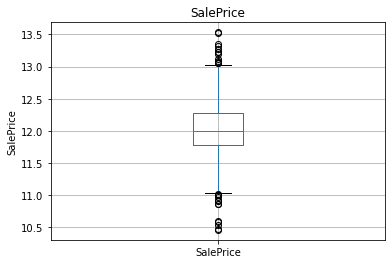

In [22]:
#Outliers in Data

for feature in continous_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column= feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [23]:
categorical_features = []
for feature in dataset.columns:
    if dataset[feature].dtypes == 'O':
        categorical_features.append(feature)
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [24]:
dataset[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [25]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [26]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

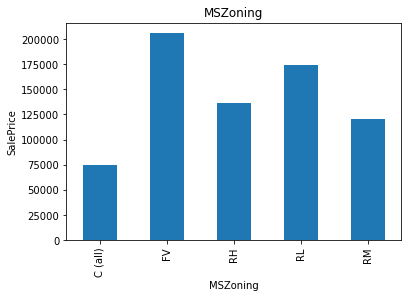

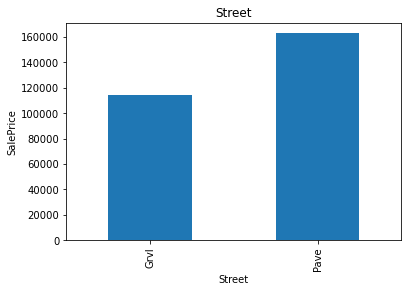

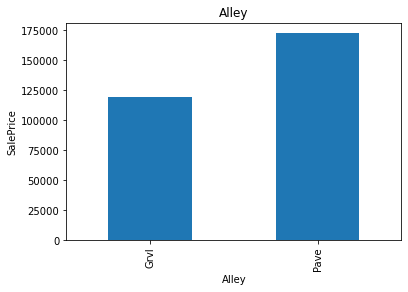

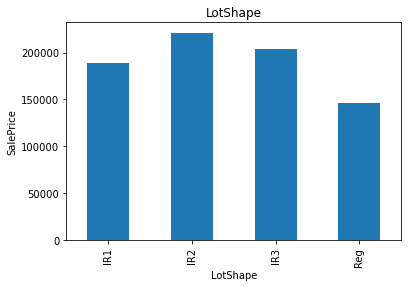

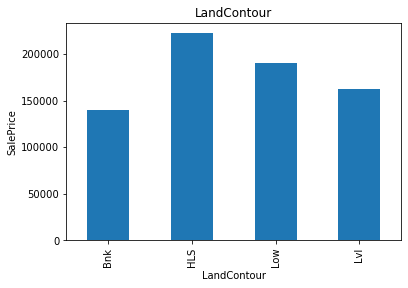

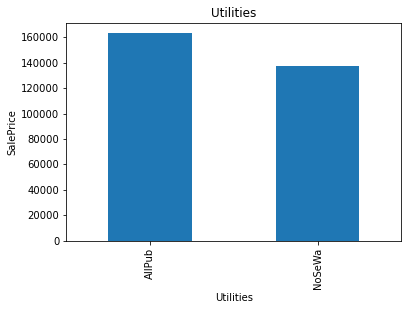

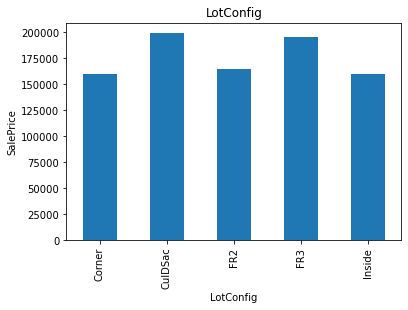

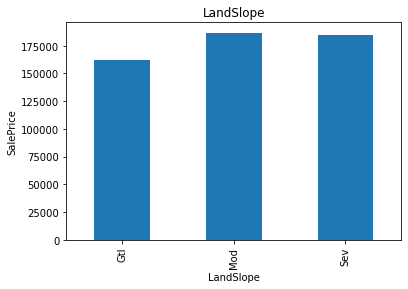

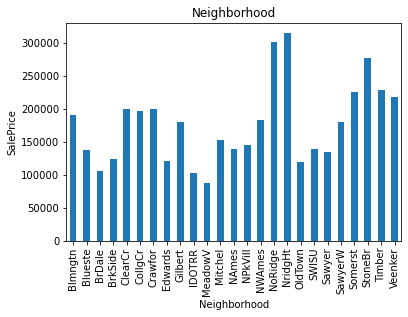

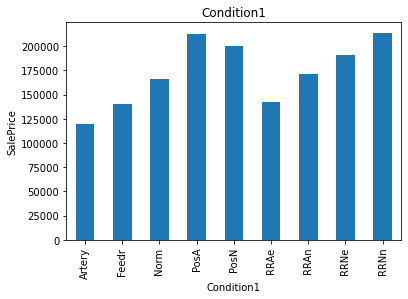

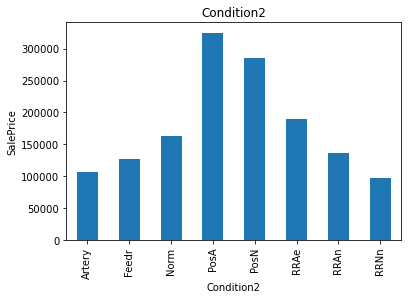

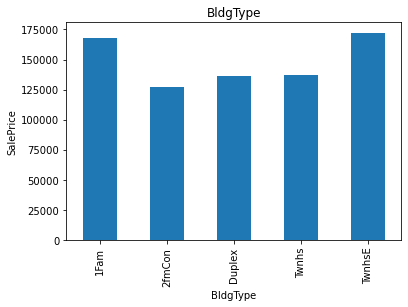

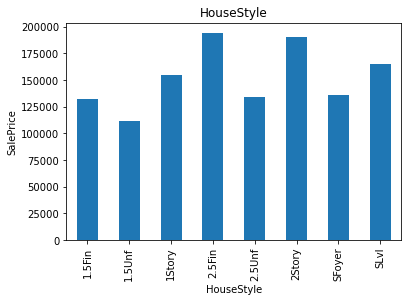

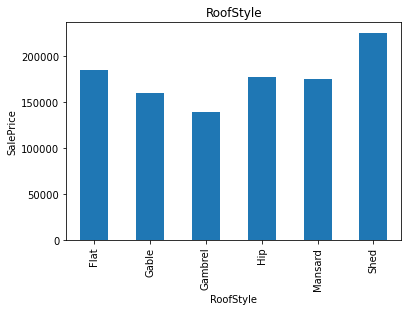

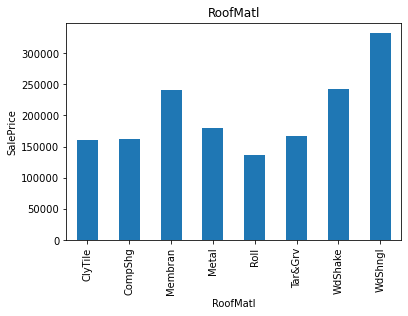

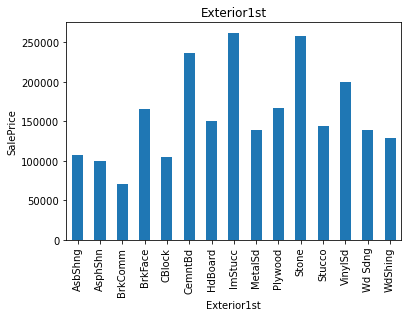

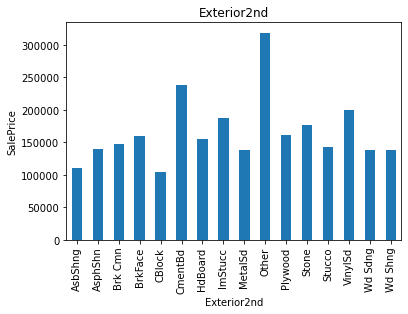

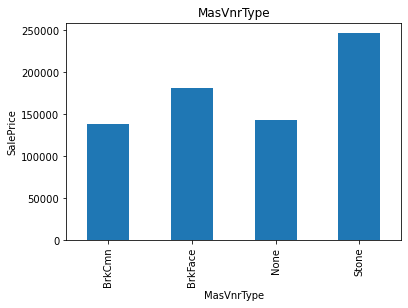

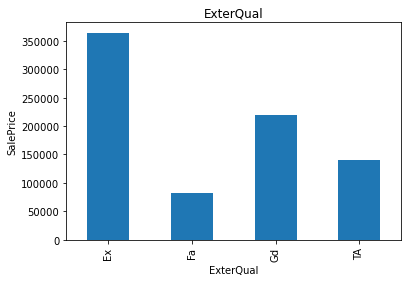

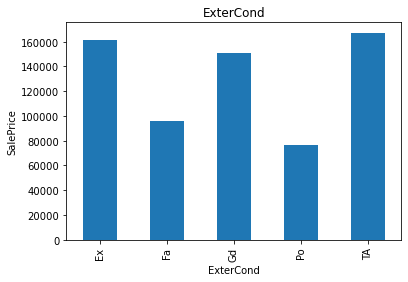

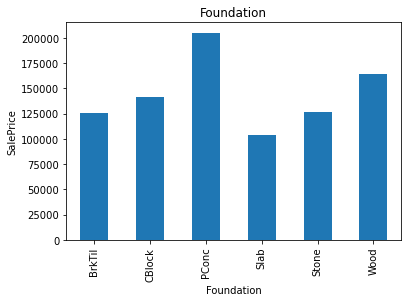

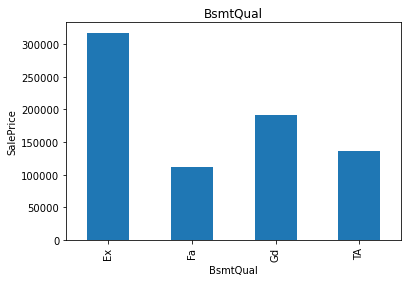

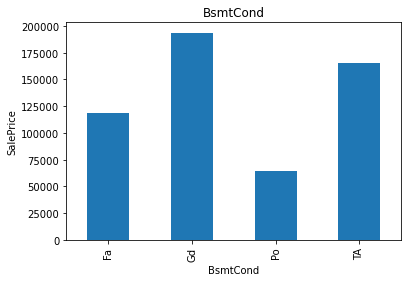

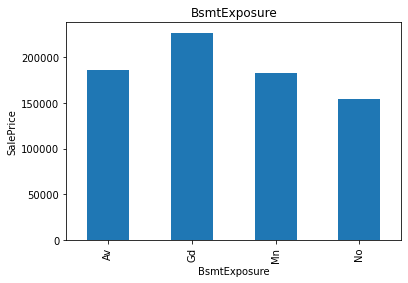

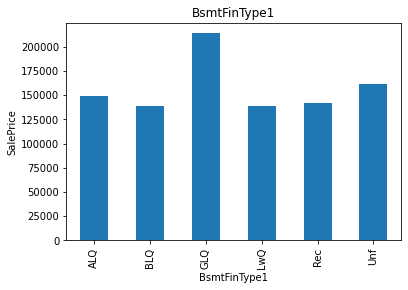

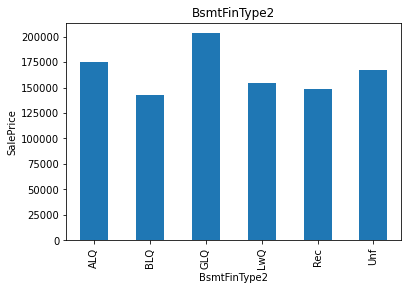

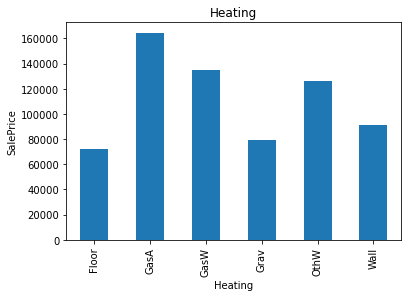

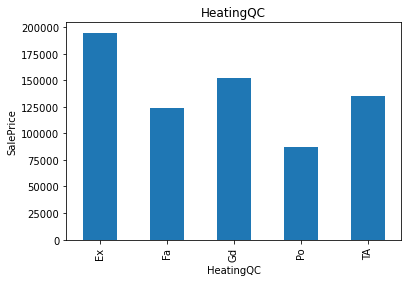

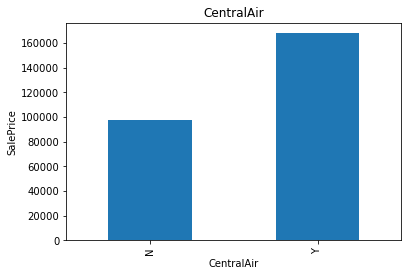

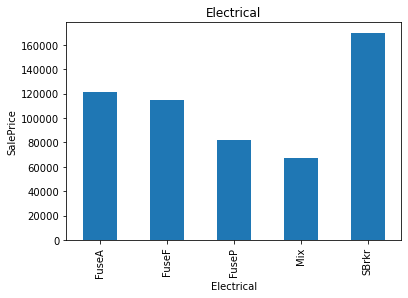

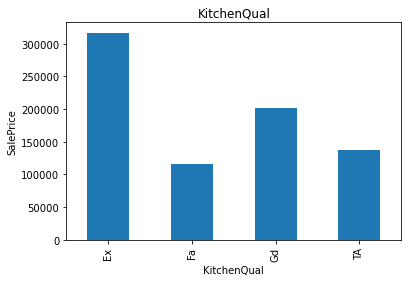

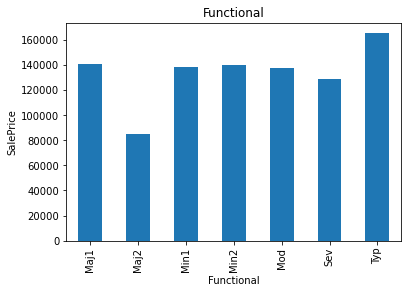

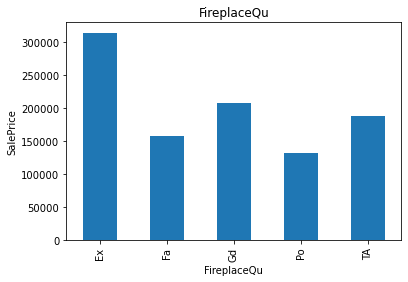

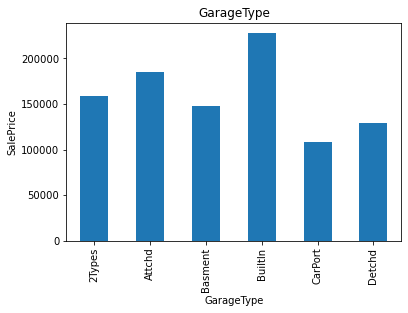

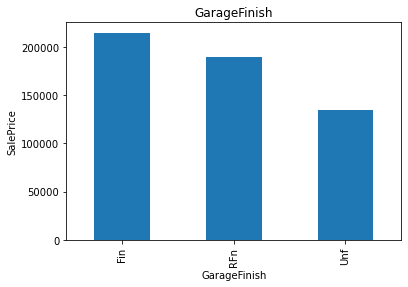

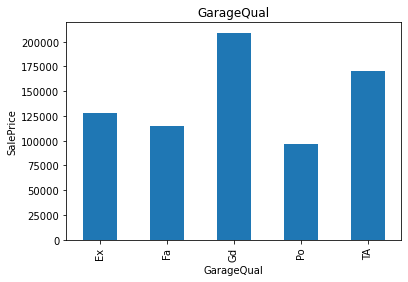

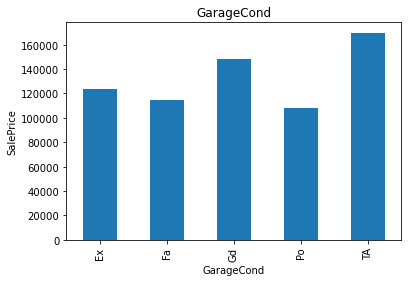

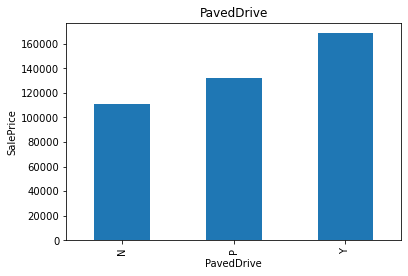

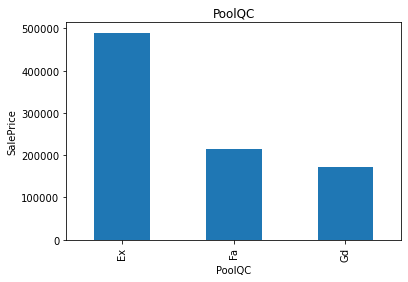

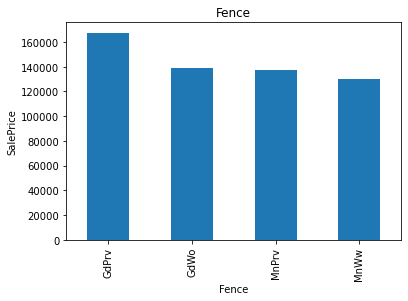

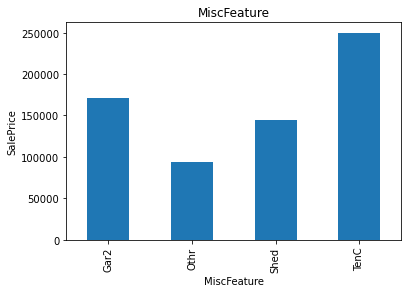

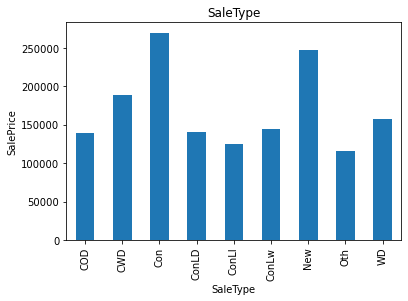

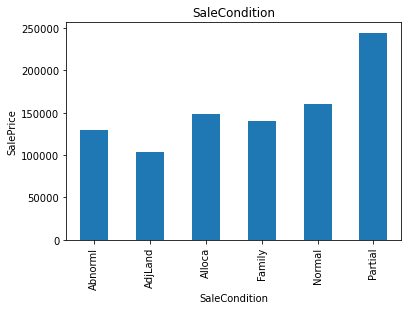

In [27]:
for feature in categorical_features:
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Feature Engineering

In [28]:
#We will be performing all the below steps in Feature Engineering

# 1.Missing values
# 2.Temporal variables
# 3.Categorical variables: remove rare labels
# 4.Standarise the values of the variables to the same range

In [29]:
# Handle Null values in Categorical features
categorical_nan_features = []
for feature in dataset.columns:
    if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes == 'O':
        categorical_nan_features.append(feature)

In [30]:
dataset[categorical_nan_features]

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,None,Gd,TA,No,Unf,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
1456,NaN,Stone,Gd,TA,No,ALQ,Rec,TA,Attchd,Unf,TA,TA,NaN,MnPrv,NaN
1457,NaN,None,TA,Gd,No,GLQ,Unf,Gd,Attchd,RFn,TA,TA,NaN,GdPrv,Shed
1458,NaN,None,TA,TA,Mn,GLQ,Rec,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN


In [31]:
#Replaced the missing values in categorical feature with new Label

def replace_cat_nan_values(dataset , features):
    data = dataset.copy()
    for feature in features:
        data[feature] = data[feature].fillna('Missing')
    return data
    
dataset = replace_cat_nan_values(dataset , categorical_nan_features)
    

In [32]:
dataset[categorical_nan_features].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [33]:
numerical_nan_features = []
for feature in dataset.columns:
    if dataset[feature].isnull().sum() > 1 and dataset[feature].dtypes != 'O':
        numerical_nan_features.append(feature) 
numerical_nan_features    

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [34]:
#Replaced the missing values in Numerical feature with some value
def replace_numeric_missing_values(dataset , features):
    data = dataset.copy()
    for feature in features:
        median_val = data[feature].median()
        data[feature + ' nan'] = np.where(dataset[feature].isnull()  , 1 ,0)
        data[feature] = data[feature].fillna(median_val)
    return data

In [35]:
dataset = replace_numeric_missing_values(dataset , numerical_nan_features)

In [36]:
dataset[numerical_nan_features].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [37]:
dataset.shape

(1460, 84)

In [38]:
# Handling the temporal variables
for feature in Temporal_features:
    if feature != 'YrSold':
        dataset[feature] = dataset['YrSold'] - dataset[feature]

In [39]:
dataset[Temporal_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [40]:
continous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [41]:
#Making the continous Numerical features distribution as gaussian
for feature in continous_features :
    if 0 not in dataset[feature].unique():
        dataset[feature] = np.log(dataset[feature])

In [42]:
dataset[continous_features]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,4.174387,9.041922,196.0,706,0,150,856,6.752270,854,7.444249,548,0,61,0,0,12.247694
1,4.382027,9.169518,0.0,978,0,284,1262,7.140453,0,7.140453,460,298,0,0,0,12.109011
2,4.219508,9.328123,162.0,486,0,434,920,6.824374,866,7.487734,608,0,42,0,0,12.317167
3,4.094345,9.164296,0.0,216,0,540,756,6.867974,756,7.448334,642,0,35,272,0,11.849398
4,4.430817,9.565214,350.0,655,0,490,1145,7.043160,1053,7.695303,836,192,84,0,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.127134,8.976768,0.0,0,0,953,953,6.859615,694,7.406711,460,0,40,0,0,12.072541
1456,4.442651,9.486076,119.0,790,163,589,1542,7.636752,0,7.636752,500,349,0,0,0,12.254863
1457,4.189655,9.109636,0.0,275,0,877,1152,7.080026,1152,7.757906,252,0,60,0,0,12.493130
1458,4.219508,9.181632,0.0,49,1029,0,1078,6.982863,0,6.982863,240,366,0,112,0,11.864462


In [43]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [44]:
#  Handling rare Categorical Features
#if any of category in the Features is having less than 1% of the occurance then we can remove that 
#category and replace it with some new Label
for feature in categorical_features:
    temp = dataset.groupby(feature).count()/len(dataset)
    temp_df = temp[temp > 0.1].index
    dataset[feature] = np.where(dataset[feature].isin(temp_df), dataset[feature] , 'rar_val')    
        

In [45]:
dataset[categorical_features].head(50)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
5,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Shed,WD,Normal
6,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
7,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Shed,WD,Normal
8,RM,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,Missing,Missing,Missing,WD,Abnorml
9,RL,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,Missing,Missing,Missing,WD,Normal


In [46]:
dataset.shape

(1460, 84)

In [47]:
#Encoded the categorical Features to numbers by sorting the categories and assinging the index as number

for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [48]:
dataset[categorical_features].head(100)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,0,1,1,0,0,15,3,4,3,6,1,2,12,13,2,2,3,5,3,3,1,6,5,5,4,1,5,2,6,1,5,2,3,5,2,0,4,2,4,4
1,3,1,2,0,1,1,2,0,20,1,4,3,4,1,2,6,6,1,1,3,2,3,3,4,4,5,5,4,1,5,1,6,3,5,2,3,5,2,0,4,2,4,4
2,3,1,2,1,1,1,0,0,15,3,4,3,6,1,2,12,13,2,2,3,5,3,3,2,6,5,5,4,1,5,2,6,3,5,2,3,5,2,0,4,2,4,4
3,3,1,2,1,1,1,1,0,17,3,4,3,6,1,2,4,7,1,1,3,1,2,4,1,4,5,5,3,1,5,2,6,4,2,1,3,5,2,0,4,2,4,1
4,3,1,2,1,1,1,2,0,24,3,4,3,6,1,2,12,13,2,2,3,5,3,3,3,6,5,5,4,1,5,2,6,3,5,2,3,5,2,0,4,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,1,2,3,1,1,1,0,14,3,4,3,6,1,2,12,13,2,3,2,5,3,4,1,4,5,5,3,1,5,1,6,3,6,3,3,5,2,0,4,1,4,4
96,3,1,2,1,1,1,0,0,15,3,4,3,4,1,2,12,13,2,2,3,5,3,3,3,4,5,5,4,1,5,2,6,1,5,2,3,5,2,0,4,2,4,4
97,3,1,2,0,3,1,0,0,5,3,4,3,4,4,2,8,9,2,1,3,2,2,3,1,1,5,5,2,1,2,1,6,1,5,3,3,5,1,0,4,2,4,4
98,3,1,2,0,1,1,1,0,5,3,4,3,4,1,2,4,4,1,1,3,1,2,3,1,4,5,5,1,0,5,1,6,1,4,1,2,5,2,0,4,1,3,1


In [49]:
# Feature Scaling 

feature_scale = []
for feature in dataset.columns:
    if feature not in ['Id' , 'SalePrice']:
        feature_scale.append(feature)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset[feature_scale])


MinMaxScaler()

In [50]:
scaler.transform(dataset[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [51]:
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [52]:
data.to_csv('final_train_datasethousingpred.csv' , index = False)

In [53]:
data.shape

(1460, 84)

## Feature Selection

In [54]:
df = pd.read_csv('final_train_datasethousingpred.csv')

In [55]:
df.shape

(1460, 84)

In [56]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [57]:
y_train = df['SalePrice']
x_train = df.drop(['Id' , 'SalePrice'] , axis = 1)

In [58]:
x_train.shape

(1460, 82)

In [59]:
y_train.shape

(1460,)

In [60]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.003 , random_state = 0))
feature_sel_model.fit(x_train , y_train)

SelectFromModel(estimator=Lasso(alpha=0.003, random_state=0))

In [61]:
feature_sel_model.get_support()

array([ True,  True, False,  True, False, False,  True, False, False,
        True, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False,  True, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [62]:
selected_features = x_train.columns[(feature_sel_model.get_support())]

In [63]:
len(selected_features)

27

In [64]:
x_train = x_train[selected_features]

In [65]:
x_train.shape

(1460, 27)

In [66]:
y_train.shape

(1460,)

In [67]:
x_train.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Foundation,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,HalfBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.75,0.366344,0.000000,0.00,0.625000,0.666667,0.500,0.098361,0.2,1.0,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.5,0.666667,0.000000,0.2,0.833333,0.666667,0.50,1.0,0.8
1,0.000000,0.75,0.391317,0.000000,0.50,0.833333,0.555556,0.875,0.524590,0.2,0.4,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.0,0.333333,0.333333,0.6,0.833333,0.666667,0.50,1.0,0.8
2,0.235294,0.75,0.422359,0.333333,0.00,0.625000,0.666667,0.500,0.114754,0.2,1.0,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.5,0.666667,0.333333,0.6,0.833333,0.666667,0.50,1.0,0.8
3,0.294118,0.75,0.390295,0.333333,0.25,0.708333,0.666667,0.500,0.606557,0.2,0.2,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.0,0.666667,0.333333,0.8,0.333333,0.333333,0.75,1.0,0.2
4,0.235294,0.75,0.468761,0.333333,0.50,1.000000,0.777778,0.500,0.147541,0.2,1.0,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.5,0.666667,0.333333,0.6,0.833333,0.666667,0.75,1.0,0.8


In [68]:
y_train.shape

(1460,)

In [72]:
from sklearn.model_selection import train_test_split
x_tr, x_test, y_tr, y_test = train_test_split(x_train, y_train, test_size = 0.2)

In [75]:
x_tr

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Foundation,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,HalfBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
273,0.000000,0.75,0.391317,0.000000,0.00,0.416667,0.555556,0.625,0.360656,0.8,0.4,0.50,0.25,0.75,1.0,0.600354,0.561197,0.333333,0.0,0.333333,0.333333,0.8,0.833333,0.666667,0.25,1.0,0.8
1239,0.000000,0.75,0.379488,0.333333,0.00,0.875000,0.777778,0.500,0.032787,0.8,1.0,0.75,0.75,1.00,1.0,0.564379,0.527567,0.000000,0.0,1.000000,0.333333,0.8,0.833333,0.666667,0.50,1.0,0.8
581,0.000000,0.75,0.446148,0.000000,0.00,0.958333,0.777778,0.500,0.016393,0.8,1.0,1.00,0.25,1.00,1.0,0.685170,0.640480,0.000000,0.5,1.000000,0.333333,0.8,0.833333,0.666667,0.75,1.0,1.0
914,0.823529,1.00,0.163668,0.000000,0.00,0.791667,0.555556,0.500,0.016393,0.2,1.0,0.75,0.75,1.00,1.0,0.229176,0.459429,0.000000,0.5,0.666667,0.000000,0.2,0.333333,0.666667,0.50,1.0,1.0
1185,0.176471,0.75,0.394110,0.000000,0.00,0.208333,0.444444,0.750,0.934426,0.2,0.2,0.50,0.25,0.75,1.0,0.395186,0.458561,0.333333,0.0,0.333333,0.000000,0.2,0.833333,0.333333,0.25,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,0.235294,0.75,0.397734,0.333333,1.00,1.000000,0.666667,0.500,0.180328,0.2,1.0,0.75,0.75,1.00,1.0,0.460241,0.635421,0.333333,0.5,0.333333,0.333333,0.6,0.833333,0.333333,0.50,1.0,0.8
736,0.411765,0.75,0.368509,0.000000,0.00,0.416667,0.222222,0.375,0.934426,0.2,0.4,0.00,0.00,0.75,0.0,0.429838,0.401802,0.000000,0.0,0.333333,0.000000,0.2,0.333333,0.333333,0.50,1.0,0.8
843,0.411765,0.75,0.355633,0.000000,0.25,0.416667,0.444444,0.375,0.770492,0.2,0.4,0.50,0.25,1.00,0.0,0.637433,0.595857,0.000000,0.0,0.333333,0.000000,0.2,0.000000,0.000000,0.00,1.0,0.8
991,0.294118,0.25,0.510736,0.000000,0.25,0.166667,0.777778,1.000,0.393443,0.2,0.2,0.50,0.25,0.75,1.0,0.381792,0.584271,0.000000,0.5,0.666667,0.333333,0.8,0.833333,0.333333,0.50,0.5,0.8


In [73]:
from sklearn.ensemble import RandomForestRegressor
clf =  RandomForestRegressor()
clf.fit(x_tr, y_tr)

RandomForestRegressor()

In [76]:
y_pred = clf.predict(x_test)

In [77]:
clf.score(x_test, y_test)

0.870935097496856

In [78]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [79]:
reg.score(x_test, y_test)

0.9067545566143287

In [80]:
from keras.models import Sequential
from keras.layers import Dense

In [81]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim  = 27))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3584      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.fit(x_train, y_train, validation_split = 0.2, epochs = 100)

Epoch 1/100
37/37 [==============================] - 1s 6ms/step - loss: 69.7959 - mae: 7.6747 - val_loss: 3.0708 - val_mae: 1.4187
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 4.0007 - mae: 1.5710 - val_loss: 2.0953 - val_mae: 1.1290
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 1.6087 - mae: 0.9818 - val_loss: 1.0645 - val_mae: 0.7723
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7554 - mae: 0.6278 - val_loss: 0.6255 - val_mae: 0.5746
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5007 - mae: 0.5200 - val_loss: 0.5059 - val_mae: 0.5150
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3988 - mae: 0.4623 - val_loss: 0.4237 - val_mae: 0.4693
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3369 - mae: 0.4233 - val_loss: 0.3490 - val_mae: 0.4301
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2939 - 

In [83]:
pred = model.predict(x_test)

In [85]:
from sklearn.metrics import r2_score
r2_score(pred, y_test)

0.8803902237311543